# 確率分布を理解する

## 離散分布と連続分布

### くじ引き問題の確率分布の可視化 Program

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import comb
import japanize_matplotlib

plt.style.use('ggplot')

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化結果')

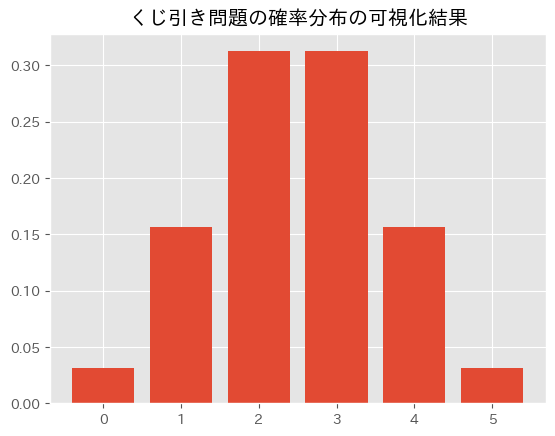

In [2]:
# くじ引き問題の確率分布の可視化 Program (n=5)
n = 5
x = range(n + 1)
y = [comb(n, i) / 2 ** n for i in x]
plt.bar(x, y)
plt.title('くじ引き問題の確率分布の可視化結果')

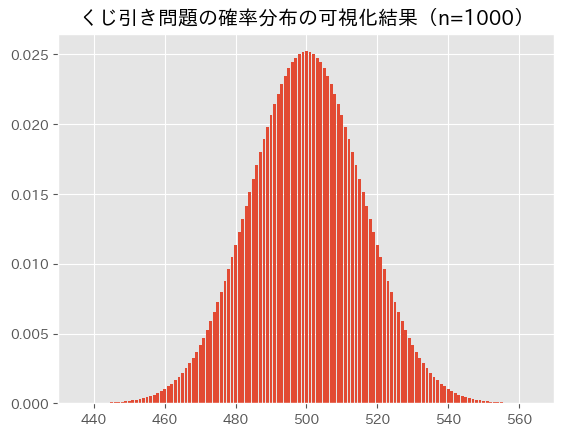

In [3]:
# くじ引き問題の確率分布の可視化 Program (n=1000)
n = 1_000
x = range(n + 1)
y = [comb(n, i) / 2**n for i in x]
plt.bar(x, y)
plt.xlim(430, 570)
plt.title('くじ引き問題の確率分布の可視化結果（n=1000）');

In [4]:
import numpy as np

In [5]:

# 正規分布関数の定義
def norm(x, mu, sigma):
    return np.exp(-((x - mu) / sigma) ** 2 / 2) / (np.sqrt(2 * np.pi) * sigma)

Text(0.5, 1.0, '確率分布と正規分布関数の重ね描き')

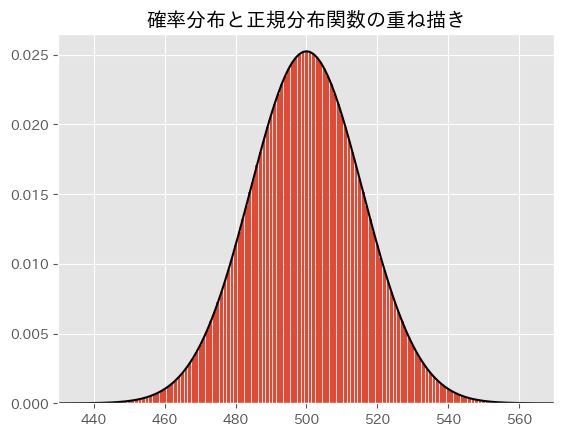

In [6]:
# 確率分布と正規分布関数の重ね描き
n = 1000

# Graph 描画
plt.xlim(430, 570)
x = np.arange(430, 571)

# 確率分布の Graph描画
y1 = [comb(n, i) / 2 ** n for i in x]
plt.bar(x, y1)

# 正規分布関数の Graph描画
mu = n / 2
sigma = np.sqrt(mu / 2)
y2 = norm(x, mu, sigma)
plt.plot(x, y2, color='k')

plt.title('確率分布と正規分布関数の重ね描き')

## PyMC いよる確率 Model 定義と Sampling

In [7]:
# Bayes 推論で必要な２つの Libray を import
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.7.2
Running on ArviZ v0.15.1


In [8]:
# 確率 Model 定義

# 確率 Model-context 用 Instance
model = pm.Model()

# 先ほど定義した Instance を with 文で指定
with model:
    # Binomial: 二項分布の確率分布Class
    # p: 二項分布の元になる施行の回数
    # n: 二項分布における施行階数
    # 'x': Sample として出力される確率変数
    x = pm.Binomial('x', n=5, p=0.5)

In [9]:
# Sampling

# with model の Context 定義により、上で定義した確率 Model と紐づけられる
# sample_prior_predictive: 事前分布の予測値取得関数
# 乱数により生成された Sample値が変数 prior_samples に Set される
with model:
    prior_samples = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


### Sampling 結果分析

In [10]:
# Notebook UI を直接利用
prior_samples

Inference data with groups:
	> prior

#### Dimensions
Sample data が全部でいくつあるのかを示している。
    - chain: Sample data が何系列存在するか。（※事前分布では意味がないので必ず１になる。）
    - draw: 同一系列内の Sample Data 数

#### Data variables
生成した Sample そのものを見ることができる。
今回の場合、下の階層に「x」という Label があり確率 Model を定義した時の `pm.Binomial('x', n=5, p=0.5)` の 'x'と対応している。

In [11]:
import pandas as pd

In [12]:
# NumPy 形式 Data を抽出

# 事前分布（prior）としての Sample値を取得
x_samples = prior_samples['prior']['x'].values  # NumPy形式 Data の抽出
    # Sample data に複数の確率変数が含まれている場合、['x'] の部分を他の確率変数Label に差し替えると対象の確率変数の値が取得できる。
print('type:', type(x_samples))  # Data の型の確認
print('shape:', x_samples.shape)  # Data size の確認
print('values:', x_samples, '\n')  # Data の値の確認

# 通常の NumPy Data として頻度分析をした例
value_counts = pd.DataFrame(x_samples.reshape(-1)).value_counts().sort_index()  # 確率変数値別の件数を Count
print(value_counts)

type: <class 'numpy.ndarray'>
shape: (1, 500)
values: [[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 

In [13]:
# ArViZ による分析

summary = az.summary(prior_samples, kind='stats')
    # kind='stats' を指定することで統計分析だけを実施。
display(summary)

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.0,4.0


- mean: 平均
- sd: 標準偏差
- hdi_3%, hdi_97%: highest density interval の略。ざっくりいうと信頼区間と似たような概念

Text(0.5, 1.0, 'ArivZ による Sample値の可視化結果')

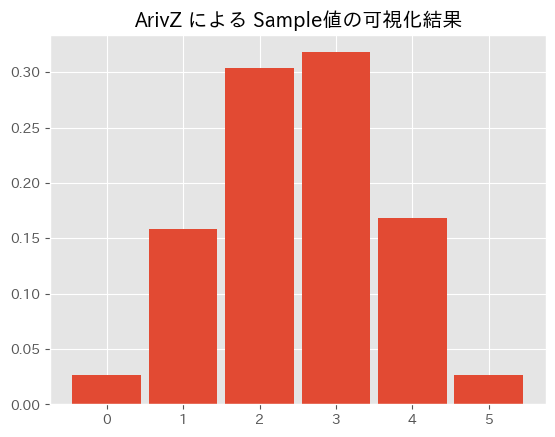

In [14]:
# ArviZ による可視化
ax = az.plot_dist(x_samples)
ax.set_title('ArivZ による Sample値の可視化結果')

ArviZ では、NumPy 形式の引数を使う関数もあるが、多くの場合、PyMC の Sampling結果の変数を丸ごと引数として使用する。

## 確率分布と PyMC Programing の関係

In [15]:
# 確率 Model 定義
model = pm.Model()

with model:
    x = pm.Binomial('x', p=0.5, n=5)
    prior_samples = pm.sample_prior_predictive(random_seed=42)

x_samples = prior_samples['prior']['x'].values

Sampling: [x]


数学概念と PyMC Programing model の関係

数学概念 | 具体例 | PyMC Programing Model
--- | --- | ---
分布関数 | $ {}_5 \mathrm{C}_k \cdot p^k(1 - p)^{5-k} $ | pm.Binomial Class
確率分布 | | `pm.Binomial('x', p=0.5, n=5)` <br> (確率 Model 定義式の右辺)
確率変数 | x <br> (５回くじを引いた時の当たりの数) | x <br> (確率 Model 定義式の左辺)
Sample値 | ２ | `prior_samples['prior']['x'].values`


# よく利用される確率分布

今回説明する確率分布

確率分布名 | PyMC Class名 | 離散・連続 
--- | --- | ---
ベルヌーイ分布 | `pm.Bernoulli` | 離散分布
二項分布 | `pm.Binomial` | 離散分布
正規分布 | `pm.Normal` | 連続分布
一様分布 | `pm.Uniform` | 連続分布
ベータ分布 | `pm.Beta` | 連続分布
半正規分布 | `pm.HalfNormal` | 連続分布

## ベルヌーイ分布 (`pm.Bernoulli` Class)
$$
P(X=k) = p^k \cdot (1-p)^{1-k}
$$

In [16]:
# ベルヌーイ分布の確率 Model 定義

# Parameter設定
p = 0.5

model1 = pm.Model()
with model1:
    # pm.Bernoulli: ベルヌーイ分布
    # p: 当たる確率
    x = pm.Bernoulli('x', p=p)

In [17]:
# 事前分布の Sampling

with model1:
    prior_samples1 = pm.sample_prior_predictive(random_seed=42)

Sampling: [x]


In [18]:
# NumPy 形式の Sample値
x_samples1 = prior_samples1['prior']['x'].values
print(x_samples1)

[[1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1
  0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
  0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1
  1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
  1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
  0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
  1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
  0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1
  1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0
  1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0
  1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1
  0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0
  1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1
  0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 

In [21]:
# Sampling 結果の
summary1 = az.summary(prior_samples1, kind='stats')
display(summary1)

,mean,sd,hdi_3%,hdi_97%
x,0.512,0.5,0.0,1.0


Text(0.5, 1.0, 'ベルヌーイ分布 p=0.5')

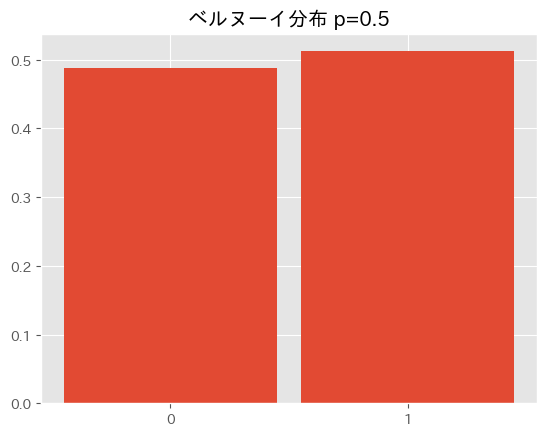

In [22]:
# Sampling結果の可視化
ax = az.plot_dist(x_samples1)
ax.set_title(f'ベルヌーイ分布 p={p}')

得られた Sampling結果
確率0.5で当たりのでるくじ引きにおいて、当たり(1)、はずれ(0) で表現した確率変数の Sample値として妥当

## 二項分布（pm.Binomial Class）
### 二項分布を示す数式
$$
P(X = k) = {}_n\mathrm{C}_k \cdot p^k(1 - p)^{n-k}
$$

In [23]:
# 二項分布の確率 Model の定義

# Parameter設定
p = 0.5
n = 5

model2 = pm.Model()
with model2:
    # pm.Binomial: 二項分布
    # p: 施行が成功する確率
    # n: 施行回数
    x = pm.Binomial('x', p=p, n=n)

Sampling: [x]


[[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 4 0 4 4 2 2 1 4
  1 3 2 0 0 3 2 2 3 3 4 4 2 1 2 3 2 2 

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.0,4.0


Text(0.5, 1.0, '二項分布 p= 0.5 n=5')

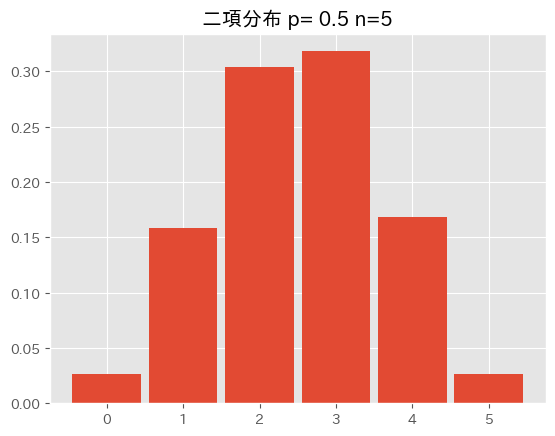

In [25]:
# Sampling と結果分析
with model2:
    prior_samples2 = pm.sample_prior_predictive(random_seed=42)  # Sampling

# Sample値抽出
x_samples2 = prior_samples2['prior']['x'].values
print(x_samples2)

# Sampling結果の統計分析
summary2 = az.summary(prior_samples2, kind='stats')
display(summary2)

# Sampling結果の可視化
ax = az.plot_dist(x_samples2)
ax.set_title(f'二項分布 p= {p} n={n}')

- $n = 5$ の場合、確率変数 $X$ の値は、0 ~ 5 までの整数。
- 平均値は、2.5 に近い。
- 棒グラフの結果から、2 と 3 の出現頻度が高い。

Sampling: [x]


[[30 30 29 23 31 22 34 27 21 24 26 22 23 30 25 20 30 17 27 25 22 24 28 29
  20 26 21 26 27 28 23 26 20 26 28 27 18 29 27 19 22 29 26 21 27 28 23 19
  20 25 25 22 24 31 29 26 31 26 29 27 32 30 26 24 27 25 26 20 19 23 20 24
  19 21 26 25 25 28 26 28 20 20 27 26 22 24 24 25 25 26 25 22 20 27 24 18
  26 29 24 23 24 27 22 28 29 30 19 30 32 28 19 28 26 26 22 27 25 24 25 27
  23 26 27 30 30 20 28 26 28 26 27 30 26 32 28 26 27 23 31 27 26 23 28 26
  25 29 20 28 25 30 27 20 29 28 26 30 23 28 32 24 18 27 24 24 23 25 17 16
  24 20 25 30 21 24 26 22 27 27 28 26 23 21 25 24 22 30 23 26 26 22 24 24
  21 26 21 21 26 22 28 19 27 31 26 24 23 22 24 20 24 25 22 29 28 22 23 30
  27 25 28 23 17 25 26 31 28 27 29 24 27 26 24 25 27 22 29 25 20 26 23 29
  30 27 29 21 32 22 26 23 22 27 27 29 25 20 22 29 23 24 25 20 27 25 28 23
  24 31 22 24 24 29 25 22 26 25 28 25 24 27 21 22 22 24 19 29 27 34 19 26
  26 24 19 30 25 20 21 25 27 32 25 26 19 26 34 28 24 25 25 25 19 29 26 28
  28 27 26 25 23 21 24 24 22 25 30 22 

,mean,sd,hdi_3%,hdi_97%
x,24.998,3.456,18.0,30.0


Text(0.5, 1.0, '二項分布 p=0.5 n=50')

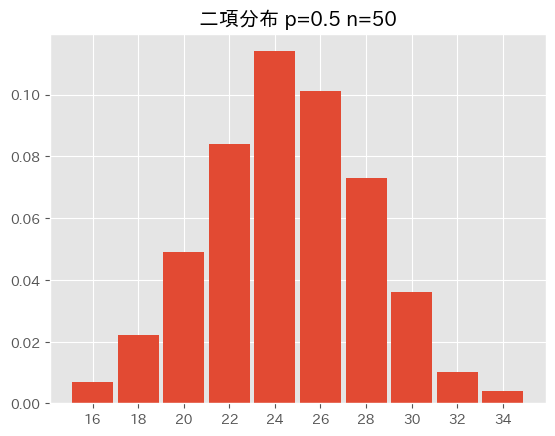

In [26]:
# 二項分布の確率モデル定義

# Parameter設定
p = 0.5
n = 50

model3 = pm.Model()
with model3:
    # pm.Binomial: 二項分布
    # p: 施行が成功する確率
    # n: 施行階数
    x = pm.Binomial('x', p=p, n=n)

    # Sampling
    prior_samples3 = pm.sample_prior_predictive(random_seed=42)

# Sample値の抽出
x_samples3 = prior_samples3['prior']['x'].values
print(x_samples3)

# Sampling結果の統計分析
summary3 = az.summary(prior_samples3, kind='stats')
display(summary3)

# Sampling結果の可視化
ax = az.plot_dist(x_samples3)
ax.set_title(f'二項分布 p={p} n={n}')

- 理屈の上では、Sample値が 0 や 50 になることもありえるが、実際にはそのような結果は一切なし。
- Sample値の分布が最小値16, 最大値34 と理論上の平均値25.0 に近い領域に集中。

一般的に二項分布は $n$ の値を大きくすることで、棒グラフの形状が釣鐘型に近づく（※正規分布と関係している。）